<a href="https://colab.research.google.com/github/easydong02/Year-Dream/blob/main/Machine_Learning/sklearn_tutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Scikit-learn을 이용한 머신러닝 학습 가이드!

- scikit-learn(sklearn)을 완전히 사용해서 end-to-end로 학습시키는 코드를 완성해봅니다!

- 너무나 유명한 california house pricing 데이터를 이용하여 회귀분석 예제 코드를 만들어봅시다.


> Data Load - Data Preprocessing - Fit - Evalution - Predict

In [7]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd

In [1]:
!pip install sklearn

In [5]:
# Hands-on!!
from sklearn.datasets import fetch_california_housing

X = fetch_california_housing(as_frame=True).data  # X
Y = fetch_california_housing(as_frame=True).target # Y
print(X.shape, Y.shape)

(20640, 8) (20640,)


## Data Preprocessing + EDA

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
dtypes: float64(8)
memory usage: 1.3 MB


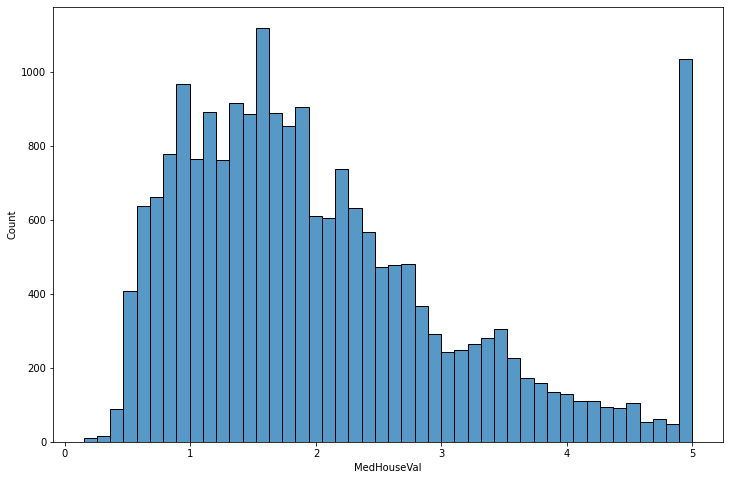

In [8]:
# 1. 결측치 확인
X.info()


# 2. dtype이 object인 column이 있는지 확인 --> categorical feature를 확인하기 위해

# 3. target distribution
plt.figure(figsize=(12,8))
sns.histplot(Y)
plt.show()

In [14]:
## Train-test Split
from sklearn.model_selection import train_test_split



# train - test
X_train,X_test,Y_train,Y_test =  train_test_split(X,Y, test_size=0.2, random_state = 42)   #random_state 는 숫자에 의미 없다.
print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)


(16512, 8) (4128, 8) (16512,) (4128,)


## Training(Fit)

In [24]:
# 1. 사용할 함수를 불러옵니다.
from sklearn.linear_model import LinearRegression
from lightgbm.sklearn import LGBMRegressor

# 2. 사용할 함수의 객체를 생성합니다.
reg = LinearRegression()
reg2 = LGBMRegressor()

# 3. 학습
reg.fit(X_train,Y_train) ## Regression : supervised learning  --> parameter update.
reg2.fit(X_train,Y_train)

LGBMRegressor()

## Evaluation

In [25]:
from numpy.ma.core import mean
# 학습 결과를 확인(평가 지표.)
from sklearn.metrics import mean_squared_error, r2_score

pred = reg.predict(X_train)  # pred == y_hat
pred2= reg2.predict(X_train) 
print("--- Linear Regression ---")
print("MSE : %.4f " % mean_squared_error(Y_train, pred))
print("R2 : %.4f " % r2_score(Y_train, pred))

print("\n--- Light GBM ---")
print("MSE : %.4f " % mean_squared_error(Y_train, pred2))
print("R2 : %.4f " % r2_score(Y_train, pred2))

--- Linear Regression ---
MSE : 0.5179 
R2 : 0.6126 

--- Light GBM ---
MSE : 0.1562 
R2 : 0.8831 


## Prediction

In [27]:
result = reg.predict(X_test)
result2 = reg2.predict(X_test)

print("--- Linear Regression ---")
print("MSE : %.4f " % mean_squared_error(Y_test, result))
print("R2 : %.4f " % r2_score(Y_test, result))

print("\n--- Light GBM ---")
print("MSE : %.4f " % mean_squared_error(Y_test, result2))
print("R2 : %.4f " % r2_score(Y_test, result2))

--- Linear Regression ---
MSE : 0.5559 
R2 : 0.5758 

--- Light GBM ---
MSE : 0.2148 
R2 : 0.8360 
